# Problem Statement:

# Import Necessary Libraries

In [1]:
#importing libraries
import numpy as np #numerical package for data hadnling
import pandas as pd #pandas for the data analysis
import matplotlib.pyplot as plt
import seaborn as sns #for ploting
import pandas_profiling # genersting analysis reports
import yellowbrick #mailny used for plots
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
#loading the dataset
data = pd.read_excel("/home/santosh/code_git/Flight_Ticket_Participant_Datasets/Data_Train.xlsx")
data.head()#printing first 5 lines in the data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
#shape of the data
data.shape

(10683, 11)

In [4]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
#checking the uniqueness in the dataset
data.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

# Exploratory Data Analysis

In [6]:
#Checking the null values in the data
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
#we can see that there are null values in the data lets handle them first, 
#As there are less no of null values we are going to drop them
data.dropna(inplace=True)

In [8]:
#We have removed all the null values and lets continue
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,10682.0,9087.214567,4611.54881,1759.0,5277.0,8372.0,12373.0,79512.0


In [11]:
#Getting report using pandas-profiling
pandas_profiling.ProfileReport(pd.read_excel("/home/santosh/code_git/Flight_Ticket_Participant_Datasets/Data_Train.xlsx"))

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


In [12]:
data["Journey_month"] =pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.month

In [13]:
data["Journey_day"] =pd.to_datetime(data["Date_of_Journey"],format="%d/%m/%Y").dt.day

In [14]:
#we have converted by creating the columns so lets drop the date_of_journey column
data.drop(["Date_of_Journey"], axis = 1, inplace=True)

In [15]:
data.sample(5)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day
9512,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 28 May,2h 50m,non-stop,No info,3383,5,27
1353,Air India,Banglore,New Delhi,BLR → BOM → IDR → DEL,06:45,11:10 02 Mar,28h 25m,2 stops,No info,20999,3,1
1402,IndiGo,Kolkata,Banglore,CCU → BLR,11:30,14:05,2h 35m,non-stop,No info,5224,5,6
4465,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,06:30,18:15,11h 45m,1 stop,In-flight meal not included,10844,5,21
8061,IndiGo,Mumbai,Hyderabad,BOM → HYD,02:30,04:00,1h 30m,non-stop,No info,3342,3,15


In [16]:
#we have to convert dep_time to date time 
data["Dep_hr"] = pd.to_datetime(data["Dep_Time"]).dt.hour

In [17]:
data["Dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute

In [18]:
#we have converted by created new column so lets drop the Dep_time column
data.drop(["Dep_Time"], axis = 1, inplace=True)

In [19]:
data.sample(5)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hr,Dep_min
6487,Jet Airways,Banglore,New Delhi,BLR → DEL,22:35,2h 40m,non-stop,No info,18308,3,1,19,55
6730,Air India,Kolkata,Banglore,CCU → BBI → BOM → BLR,07:55 07 May,19h 55m,2 stops,No info,10151,5,6,12,0
1820,Vistara,Banglore,Delhi,BLR → DEL,12:35,2h 50m,non-stop,No info,5403,4,9,9,45
7591,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,09:00 07 Mar,18h 55m,1 stop,No info,17261,3,6,14,5
2671,Air India,Kolkata,Banglore,CCU → DEL → COK → BLR,01:20 10 May,18h 20m,2 stops,No info,13033,5,9,7,0


In [20]:
#arrival time when plane pulls in the lane 
#we have to covert this columns too
data["Arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour

In [21]:
data["Arrival_min"] = pd.to_datetime(data["Arrival_Time"]).dt.minute

In [22]:
#we have converted so lets drop that column
data.drop(["Arrival_Time"], axis = 1, inplace=True)

In [23]:
data.sample(5)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hr,Dep_min,Arrival_hour,Arrival_min
514,Air India,Delhi,Cochin,DEL → HYD → MAA → COK,20h 10m,2 stops,No info,8839,6,27,13,15,9,25
3957,Jet Airways,Delhi,Cochin,DEL → BOM → COK,16h 35m,1 stop,No info,17024,3,3,2,15,18,50
8853,Air India,Kolkata,Banglore,CCU → DEL → BLR,13h 15m,1 stop,No info,10203,5,9,10,0,23,15
305,Jet Airways,Delhi,Cochin,DEL → BOM → COK,15h 25m,1 stop,No info,12242,3,27,13,0,4,25
2528,Air India,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,13885,3,3,14,15,16,45


In [24]:
# Assigning and converting Duration column into list
dur = list(data["Duration"])

for i in range(len(dur)):
    if len(dur[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in dur[i]:
            dur[i] = dur[i].strip() + " 0m"   # Adds 0 minute
        else:
            dur[i] = "0h " + dur[i]           # Adds 0 hour

hur_dur = []
min_dur = []
for i in range(len(dur)):
    hur_dur.append(int(dur[i].split(sep = "h")[0]))    # Extract hours from duration
    min_dur.append(int(dur[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [25]:
#adding duration hours and duration minutes to the dataset
data["Hours_duration"] = hur_dur
data["minute_duration"] = min_dur

In [26]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Hours_duration,minute_duration
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
#dropping duration as we created new columns
data.drop(["Duration"], axis = 1, inplace=True)

## Handing categorical data

In [28]:
data["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
#as airline is nominal category we will use onehot encoding 
Airlines = data[["Airline"]]
Airlines = pd.get_dummies(Airlines, drop_first=True)
Airlines.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
data["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [31]:
#as the surce is the nomainal data we will use onehot encoding for this
Source = data[["Source"]]

Source = pd.get_dummies(Source, drop_first=True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
data["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [33]:
#as destination is nominal categorical data we will perform onehot encoding
Destination = data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first=True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [34]:
data["Route"].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
CCU → VTZ → BLR                   1
BLR → HBX → BOM → BHO → DEL       1
BOM → BBI → HYD                   1
BOM → NDC → HYD                   1
Name: Route, Length: 128, dtype: int64

In [35]:
#additional info contains many null values so lets drop theem
#and the route contains same information as destination and source lets drop them
data.drop(["Route", 'Additional_Info'], axis = 1, inplace = True)

In [36]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
# As this is case of Ordinal Categorical data, we can perform LabelEncoder
# Here values are assigned with corresponding keys

data.replace({"non-stop":0, "1 stop": 1, "2 stops": 2, "3 stops":3, "4 stops": 4}, inplace=True)

In [38]:
data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_hr,Dep_min,Arrival_hour,Arrival_min,Hours_duration,minute_duration
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [39]:
#now concat all the information 
train_data = pd.concat([data, Airlines, Source, Destination], axis = 1)

In [40]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_month,Journey_day,Dep_hr,Dep_min,Arrival_hour,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,3,24,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,...,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,...,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,...,0,0,0,0,0,0,0,0,0,1


In [41]:
#as we concatenated the data we will drop the previous columns 
train_data.drop(["Airline", "Source", "Destination", "Airline_Trujet"], axis = 1, inplace=True)

In [42]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_month                              10682 non-null  int64
 3   Journey_day                                10682 non-null  int64
 4   Dep_hr                                     10682 non-null  int64
 5   Dep_min                                    10682 non-null  int64
 6   Arrival_hour                               10682 non-null  int64
 7   Arrival_min                                10682 non-null  int64
 8   Hours_duration                             10682 non-null  int64
 9   minute_duration                            10682 non-null  int64
 10  Airline_Air India                          106

In [43]:
train_data.shape

(10682, 29)

## Handing Test data

In [44]:
test_data = pd.read_excel('/home/santosh/code/Data-Science-ML-Capstone-Projects/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')

In [45]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
print("Test data Info")
print("-"*75)
print(test_data.info())


Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


In [47]:
# EDA
print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [48]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [49]:
# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)


In [50]:
# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)


In [51]:
# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [52]:
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


In [53]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)


Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64


In [54]:
print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)


Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64


In [55]:
print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)


Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


In [56]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [57]:
# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [58]:
# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data = pd.concat([test_data, Airline, Source, Destination], axis = 1)


In [59]:
test_data.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [60]:
test_data.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0


In [61]:
print("Shape of test data : ", test_data.shape)


Shape of test data :  (2671, 28)


In [62]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        2671 non-null   int64
 1   Journey_day                        2671 non-null   int64
 2   Journey_month                      2671 non-null   int64
 3   Dep_hour                           2671 non-null   int64
 4   Dep_min                            2671 non-null   int64
 5   Arrival_hour                       2671 non-null   int64
 6   Arrival_min                        2671 non-null   int64
 7   Duration_hours                     2671 non-null   int64
 8   Duration_mins                      2671 non-null   int64
 9   Air India                          2671 non-null   uint8
 10  GoAir                              2671 non-null   uint8
 11  IndiGo                             2671 non-null   uint8
 12  Jet Airways         

array([[<AxesSubplot:title={'center':'Total_Stops'}>,
        <AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Journey_month'}>,
        <AxesSubplot:title={'center':'Journey_day'}>,
        <AxesSubplot:title={'center':'Dep_hr'}>],
       [<AxesSubplot:title={'center':'Dep_min'}>,
        <AxesSubplot:title={'center':'Arrival_hour'}>,
        <AxesSubplot:title={'center':'Arrival_min'}>,
        <AxesSubplot:title={'center':'Hours_duration'}>,
        <AxesSubplot:title={'center':'minute_duration'}>],
       [<AxesSubplot:title={'center':'Airline_Air India'}>,
        <AxesSubplot:title={'center':'Airline_GoAir'}>,
        <AxesSubplot:title={'center':'Airline_IndiGo'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways'}>,
        <AxesSubplot:title={'center':'Airline_Jet Airways Business'}>],
       [<AxesSubplot:title={'center':'Airline_Multiple carriers'}>,
        <AxesSubplot:title={'center':'Airline_Multiple carriers Premium economy'}>,
    

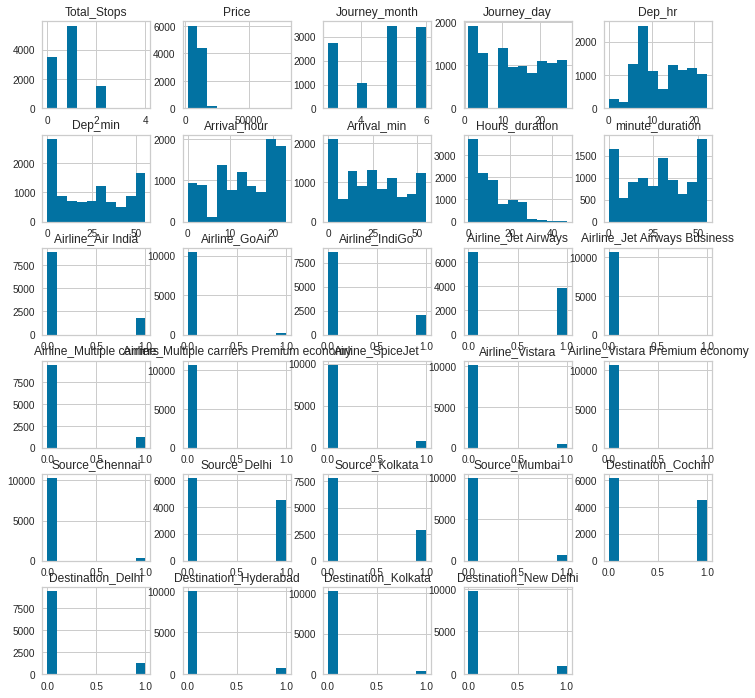

In [63]:
#plotting the hist bar of dataset
train_data.hist(figsize=(12,12),sharex=False)

# OutLiers

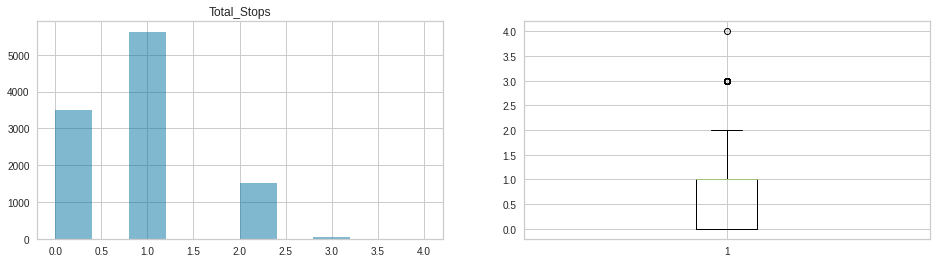

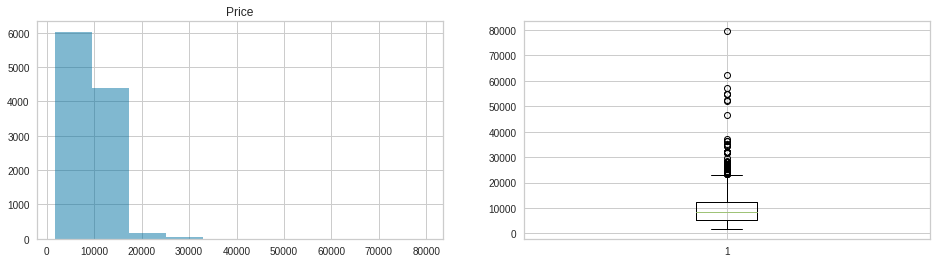

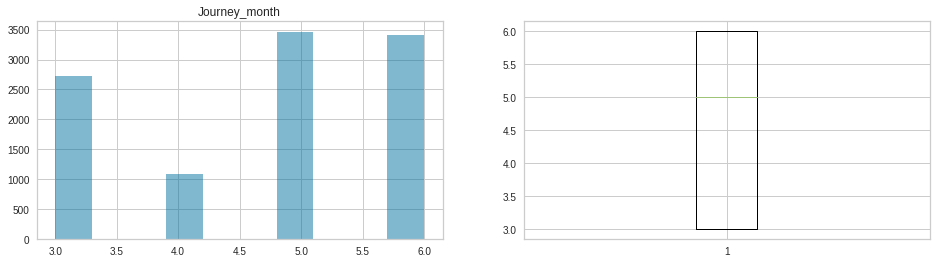

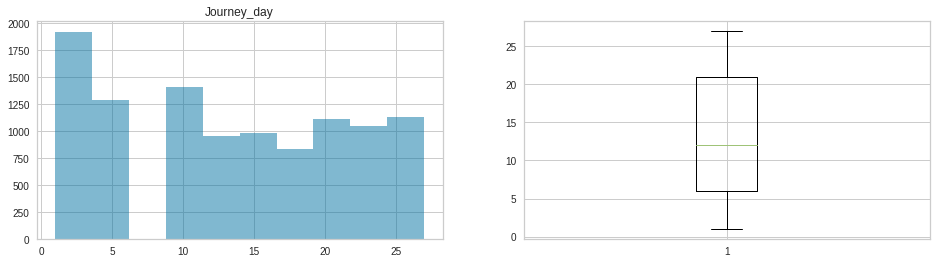

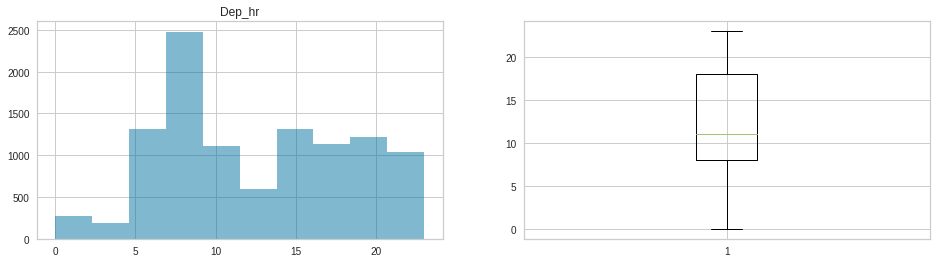

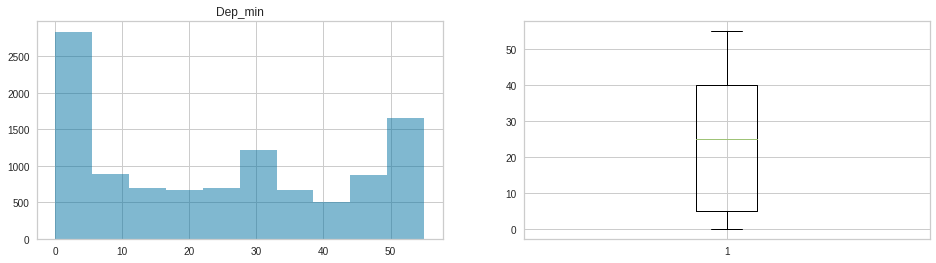

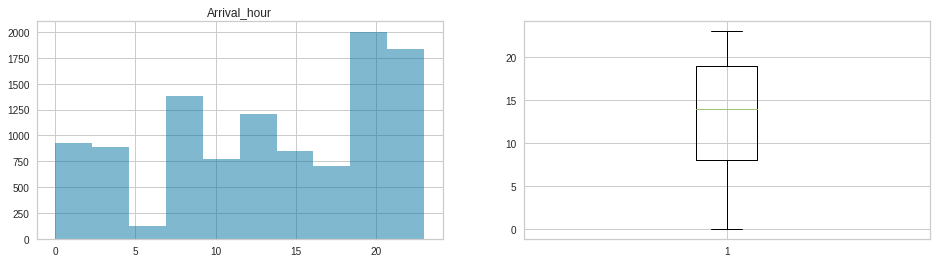

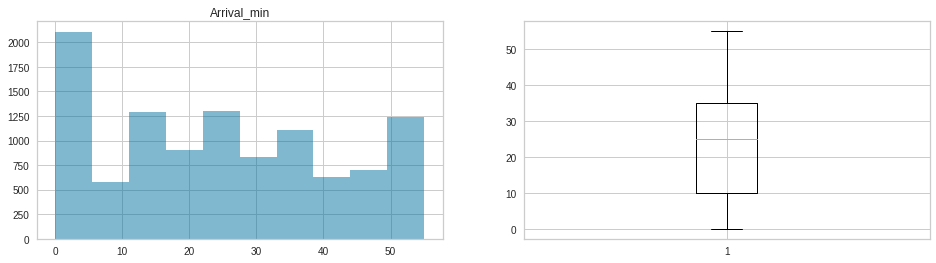

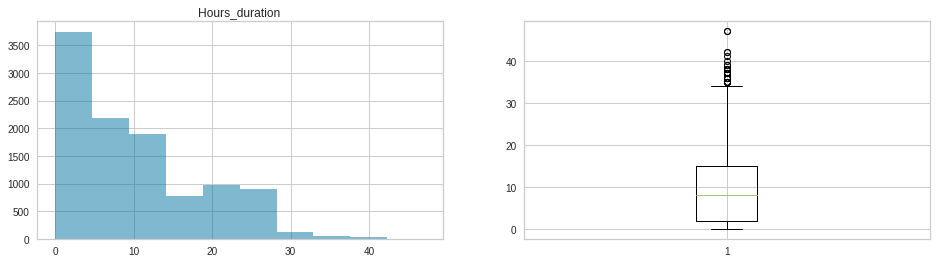

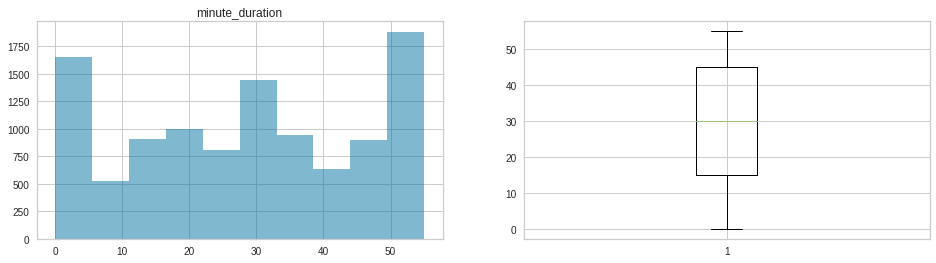

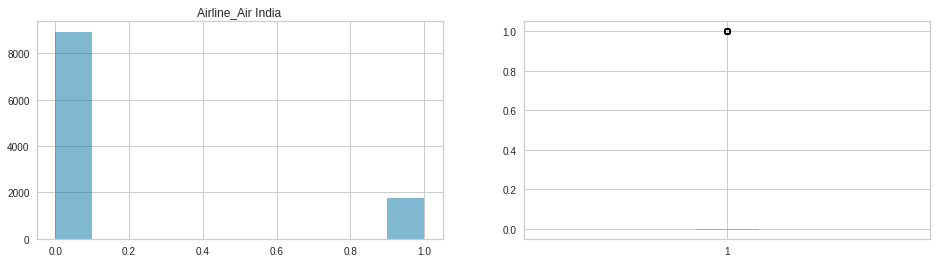

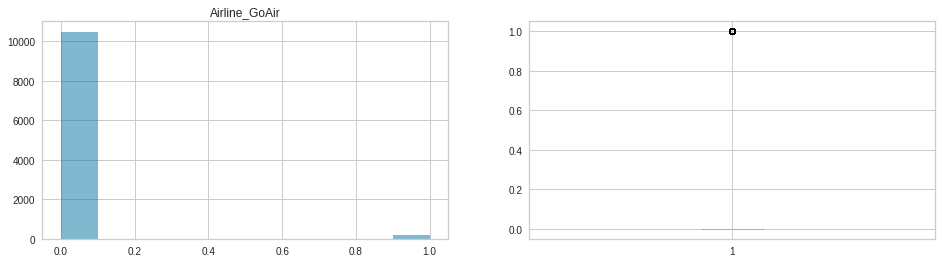

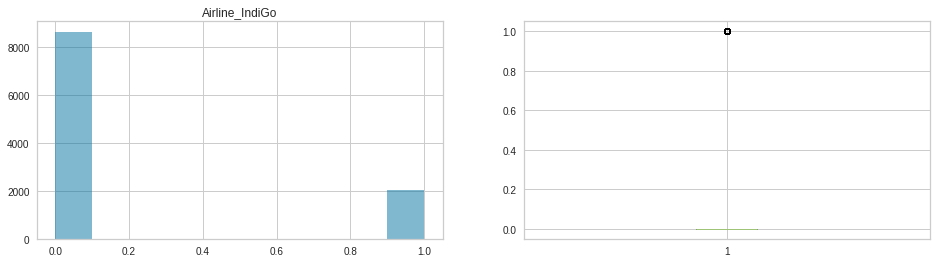

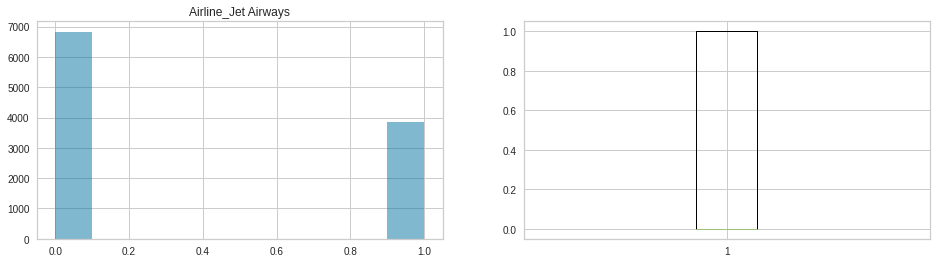

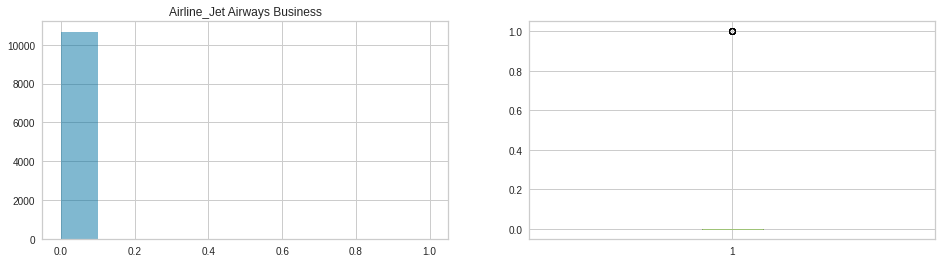

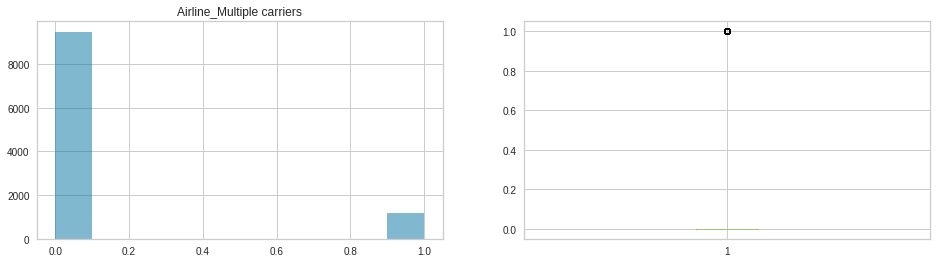

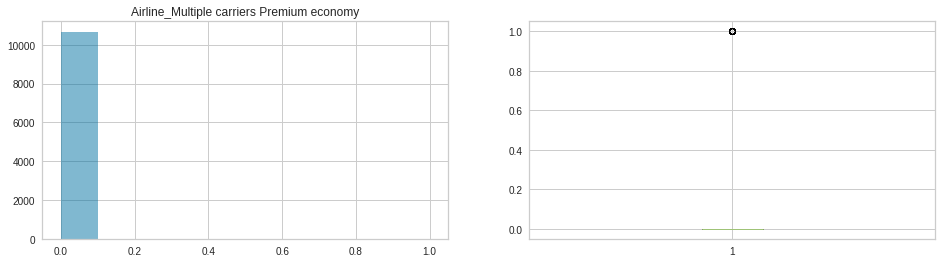

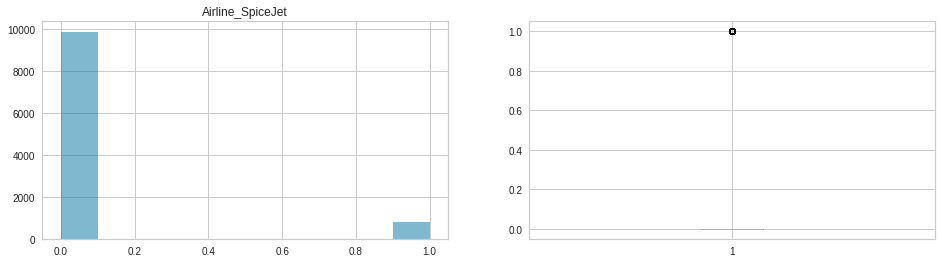

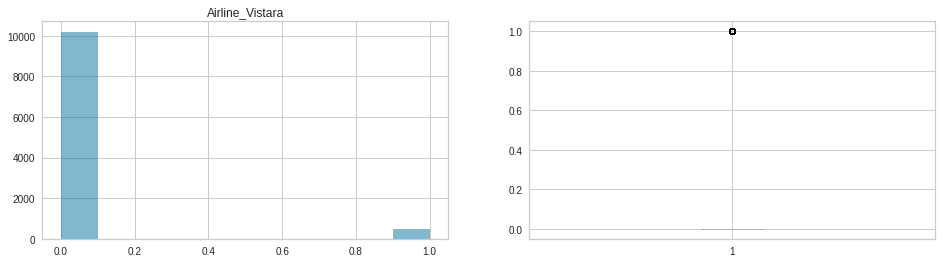

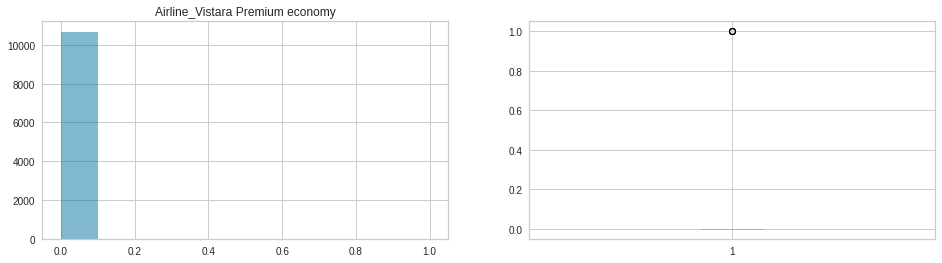

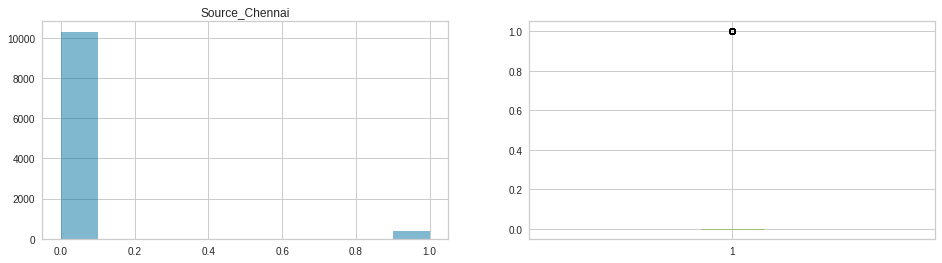

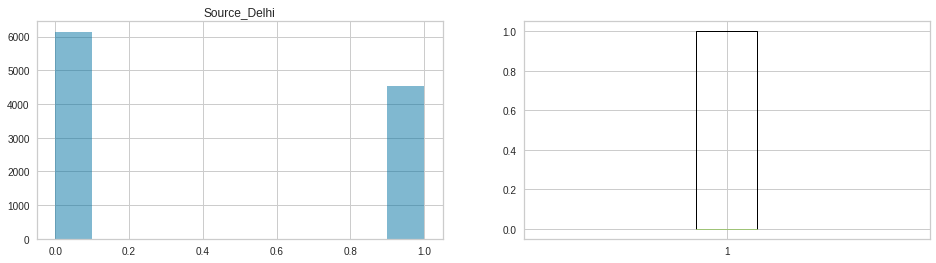

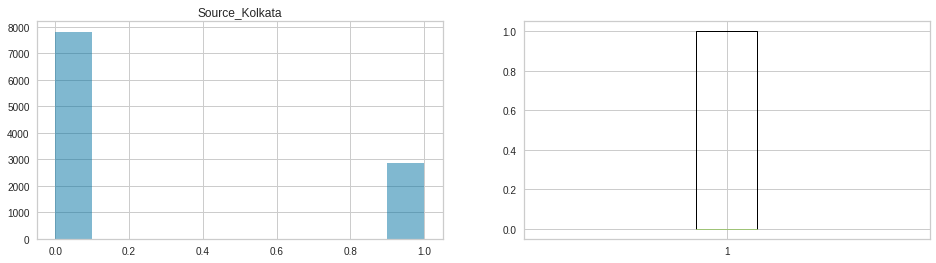

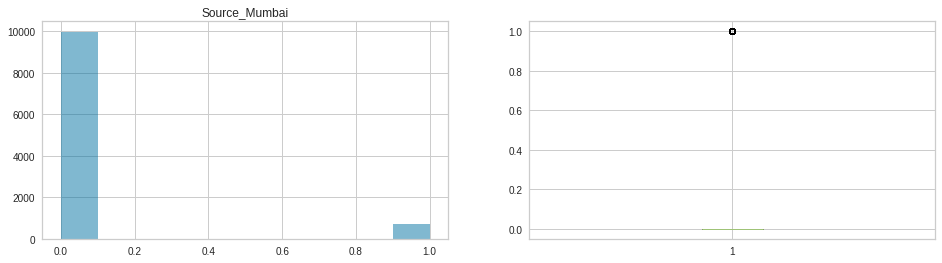

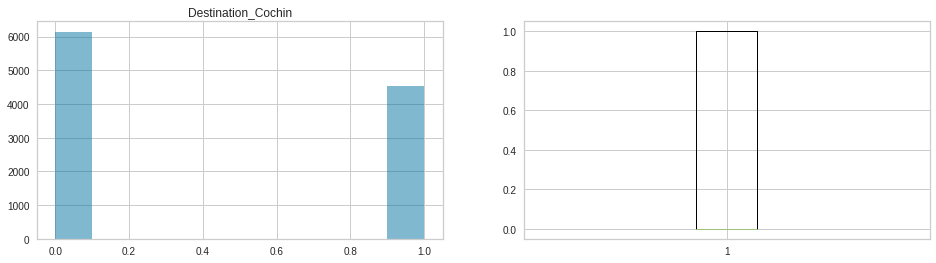

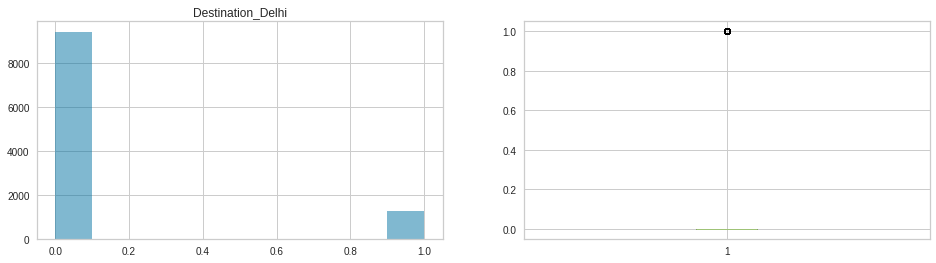

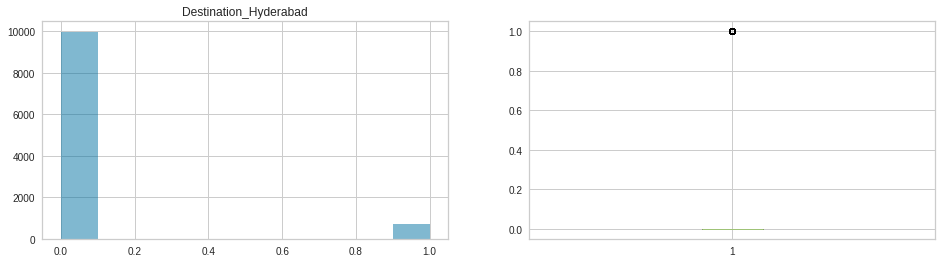

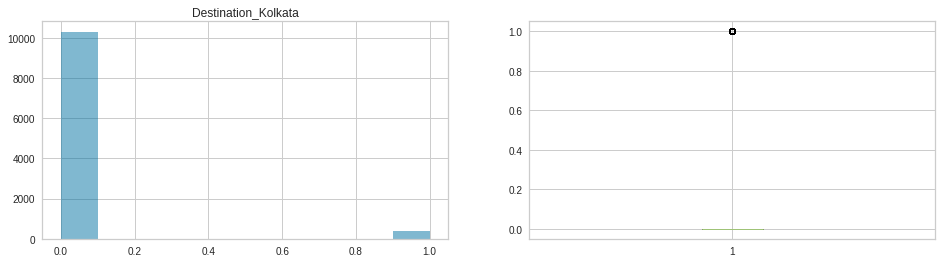

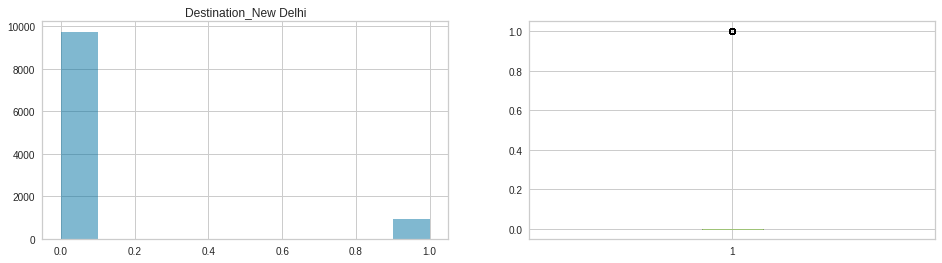

In [64]:
#In machine learning outlier detection is most important for building an accutate model to get good results
#lets create a function that deals with checking outliers
def plotingvariables(df, column):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(df[column], alpha = 0.5)
    plt.title(column)

    plt.subplot(1,2,2)
    plt.boxplot(df[column])
    plt.show()
    
    
#creating the boxplots for the data
for i in train_data:
    plotingvariables(train_data, i)

# Correlation

<AxesSubplot:>

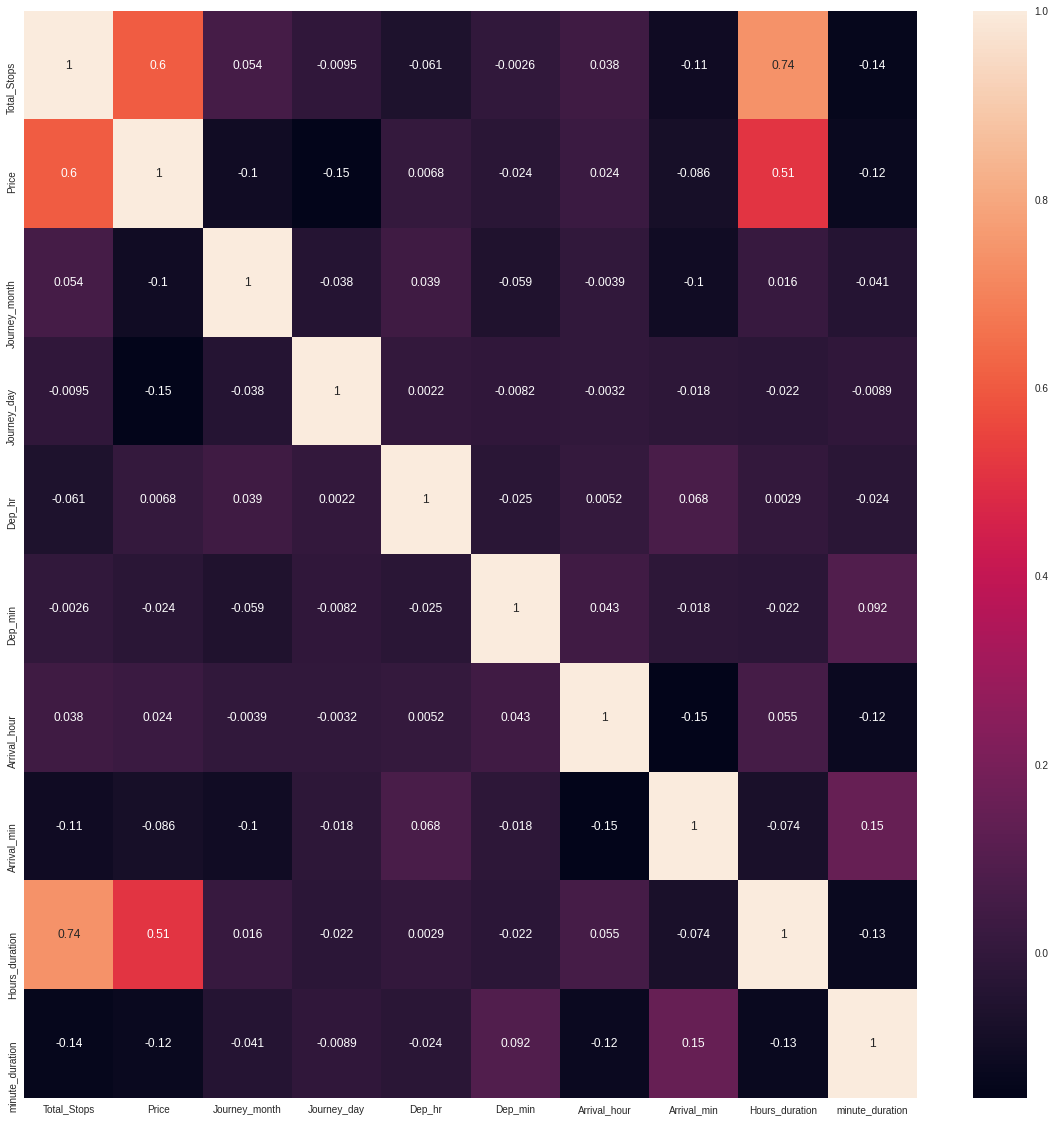

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True)

In [66]:
#actual correlation range is 0.3-0.8 and every correlation is between them no need to drop any coumn

# Feature scaling And Model creation

In [67]:
#importing necessary libraries
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from math import sqrt

In [68]:
#lets divide the test and validation data
x = train_data.drop(["Price"], axis=1)
y = train_data["Price"]
print(x.shape, y.shape)

#dividing and setting random_state
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state = 100, test_size = 0.33)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(10682, 28) (10682,)
(7156, 28) (7156,) (3526, 28) (3526,)


In [69]:
#for adjusting the skewness of data
new = pd.DataFrame(power_transform(x, method = 'yeo-johnson'), columns= x.columns)
x = new

In [70]:
#here we are going create pipelines for model creation

#creating instance for model
lr = LinearRegression()
dt = DecisionTreeRegressor()
rn = RandomForestRegressor()
scale = StandardScaler()
scalar = RobustScaler()

In [71]:
#creating pipelines for linear regression
pipeline_lr = Pipeline([
    ('robust1', scalar),
    ('scalar1', scale),
    ('lr_Regressor', lr)
])

In [72]:
#creating pipelines for Desicion tree
pipeline_dt = Pipeline([
    ('robust2', scalar),
    ('scalar2', scale),
    ('dt_Regressor', dt)
])

In [73]:
#creating pipelines for random forest
pipeline_rn = Pipeline([
    ('robust3', scalar),
    ('scalar3', scale),
    ('rn_Regressor', rn)
])

In [74]:
#creating list of pipelines
pipelines = [pipeline_lr,pipeline_dt,pipeline_rn]

In [75]:
best_accuracy = 0
best_regressor = 0
best_pipeline = ''

In [76]:
#here i am going to create a dict of piplines to make us easy to use
pipe_dict = {0 : 'LinearRegression', 1 : 'DecisionTreeRegressor', 2 : 'RandomForestRegressor' }

#now i am fitting the model with train data
for pipe in pipelines:
    pipe.fit(x_train,y_train)
    

LinearRegression has accuracy of 0.650798624351222
r2 score of is 0.650798624351222
Mean squared error is 7320280.28487989
Root mean squared error is 2705.6016493341904
Mean absolute error is 1945.0134248722884


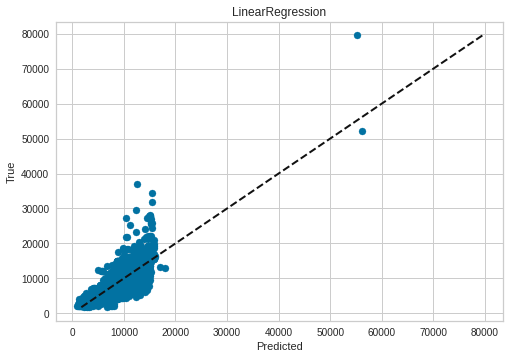

---------------------------------------------------------------------------
DecisionTreeRegressor has accuracy of 0.697768443097621
r2 score of is 0.697768443097621
Mean squared error is 6335655.761236923
Root mean squared error is 2517.0728557665793
Mean absolute error is 1393.1962232936282


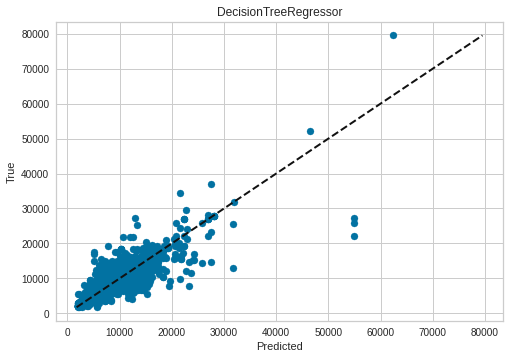

---------------------------------------------------------------------------
RandomForestRegressor has accuracy of 0.8232313481813135
r2 score of is 0.8232313481813135
Mean squared error is 3705586.996869716
Root mean squared error is 1924.990129031761
Mean absolute error is 1182.7319498282725


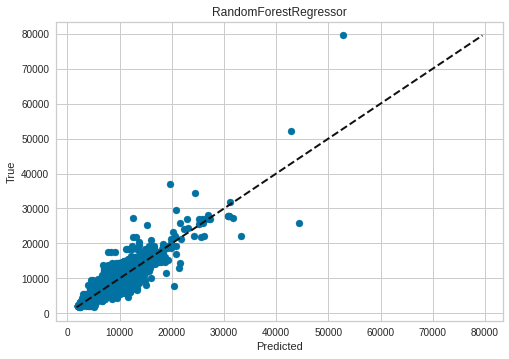

---------------------------------------------------------------------------


In [77]:
#creating a loop for model prediction
for i, model in enumerate(pipelines):
    print("{} has accuracy of {}".format(pipe_dict[i], model.score(x_test,y_test)))
    prediction = model.predict(x_test)
    print("r2 score of is {}".format(r2_score(y_test, prediction)))
    print("Mean squared error is {}".format(mean_squared_error(y_test, prediction)))
    print("Root mean squared error is {}".format(sqrt(mean_squared_error(y_test, prediction))))
    print("Mean absolute error is {}".format(mean_absolute_error(y_test, prediction)))
    plt.scatter(prediction,y_test)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(pipe_dict[i])
    plt.show()
    print('-'*75)
    
    

In [78]:
#we got good scores, lets check with cross val score to see if there is any overfitting of data
#A we can see we got good scores predicting using these models,lets check the cross val scores of the models 

results = []
names = []

for i, model in enumerate(pipelines):
    kfold = KFold(n_splits=10, random_state=100)
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring='r2')
    
    results.append(cv_results)
    names.append(i)
    
    msg = '%s: %f, %f' % (pipe_dict[i], cv_results.mean(), cv_results.std())
    print(msg)

LinearRegression: 0.622320, 0.026595
DecisionTreeRegressor: 0.719092, 0.037107
RandomForestRegressor: 0.813790, 0.031081


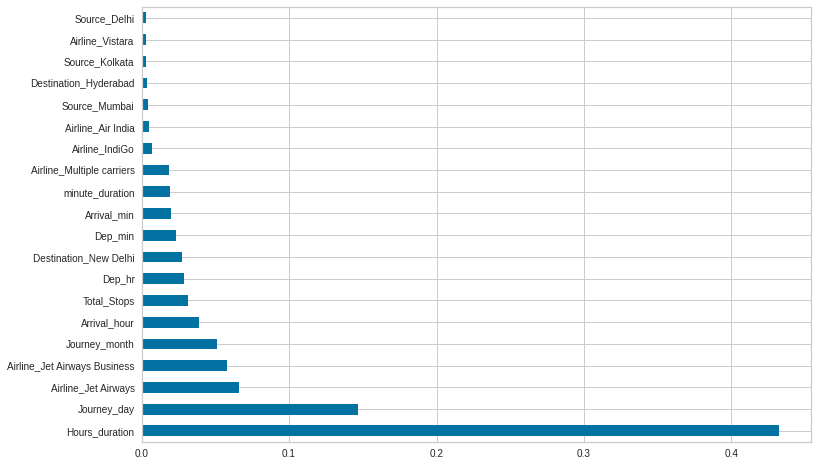

In [79]:
# plot graph of important feature for better visualization
plt.figure(figsize =(12,8))
feat_importances =pd.Series(rn.feature_importances_,index =x.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

In [80]:
#we can see that more importance is given to hours_duration column

In [81]:
#when compared with CV score we got Random forest regressor with good score and low RMSE
#so lets continue with hyperparameter tuning

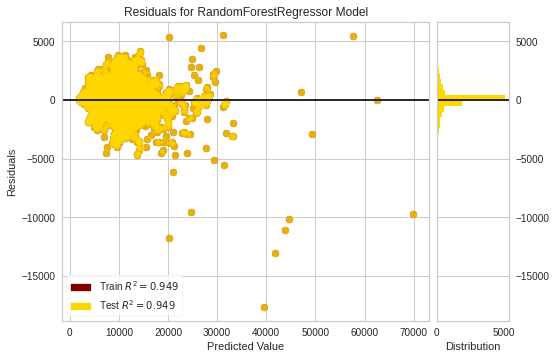

In [82]:
#we will check the distribution of residual plots, thats show difference of residuals in train and test data
from yellowbrick.regressor import residuals_plot

visualizer = residuals_plot(RandomForestRegressor(), x, y, train_color="maroon", test_color="gold")

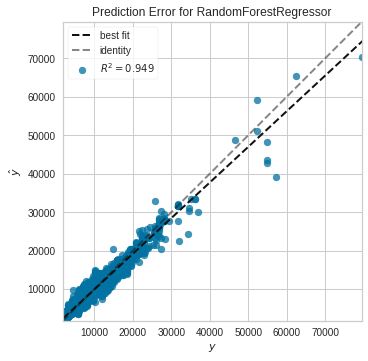

In [83]:
#A prediction error plot shows us where rgression is making more errors
from yellowbrick.regressor import prediction_error

visualize = prediction_error(RandomForestRegressor(),x, y)

# Hyperparameter Tuning

In [84]:
#creating random forest parameters
ran_params = {
    'n_estimators':[0.1,10,20,30],
    'criterion':['mse', 'mae'],
    'max_features':['auto','sqrt','log2']
    
}

In [85]:
#creating an instance for gridsearch and fitting the model
grid1 = GridSearchCV(RandomForestRegressor(), ran_params, cv = 5, verbose=0, n_jobs= -1)

In [86]:
grid1.fit(x_train,y_train)# fitting the model

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [87]:
#getting best parameters
grid1.best_params_

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 20}

In [88]:
#drawing predictions from the data
predictions = grid1.predict(x_test)

r2 score of is 0.8127063216516716
Mean squared error is 3926222.2794760126
Root mean squared error is 1981.4697271157115
Mean absolute error is 1197.596470587261


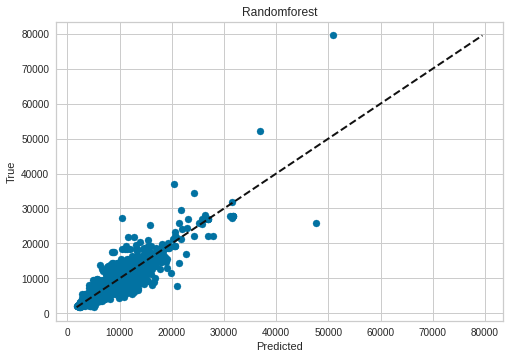

---------------------------------------------------------------------------


In [89]:
print("r2 score of is {}".format(r2_score(y_test, predictions)))
print("Mean squared error is {}".format(mean_squared_error(y_test, predictions)))
print("Root mean squared error is {}".format(sqrt(mean_squared_error(y_test, predictions))))
print("Mean absolute error is {}".format(mean_absolute_error(y_test, predictions)))
plt.scatter(predictions,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Randomforest")
plt.show()
print('-'*75)

In [90]:
#by hyper parameter tuning we have increased score by 82 percent

# Saving the model

In [91]:
import joblib #importing module
joblib.dump(grid1, "randomforest_flightprediction.obj") # saving the model in obj format

['randomforest_flightprediction.obj']

In [92]:
loading = joblib.load("randomforest_flightprediction.obj")

# Conclusion

In [93]:
#Testing the model on test data
test_data

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,...,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,6,6,20,30,20,25,23,55,1,...,0,0,0,1,0,0,0,0,0,0
2667,0,27,3,14,20,16,55,2,35,0,...,0,0,0,1,0,0,0,0,0,0
2668,1,6,3,21,50,4,25,6,35,0,...,0,0,1,0,0,1,0,0,0,0
2669,1,6,3,4,0,19,15,15,15,1,...,0,0,1,0,0,1,0,0,0,0


In [94]:
#for adjusting the skewness of data
new = pd.DataFrame(power_transform(test_data, method = 'yeo-johnson'), columns= test_data.columns)
test_data = new

In [95]:
#using Robust scalar
new1 = pd.DataFrame(scalar.fit_transform(test_data), columns=test_data.columns)
test_data = new

In [96]:
#using Standard Scalar
new2 = pd.DataFrame(scale.fit_transform(test_data), columns= test_data.columns)
test_data = new2

In [97]:
loading.fit(x,y) #fitting the training data
#creating a prediction dataframe
predictions = pd.DataFrame(loading.predict(test_data), index=range(len(test_data)), columns=["Predictions"]) 
predictions

,Predictions
0,8201.325
1,4226.000
2,10262.000
3,10171.300
4,3603.000
...,...
2666,6741.450
2667,5635.500
2668,5665.300
2669,6600.000


In [98]:
#combining both testdata and predictions into a dataframe
submission = pd.concat([test_data, predictions], axis = 1)
submission

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Air India,...,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Predictions
0,0.341177,-0.753498,1.162712,0.791425,0.443282,-1.361817,0.174993,0.323958,1.459539,-0.444096,...,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.366966,-0.273586,-0.169972,-0.312764,8201.325
1,0.341177,0.038985,0.145285,-1.178018,0.004594,-0.525790,-0.100464,-0.615366,-1.892591,-0.444096,...,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.366966,-0.273586,-0.169972,-0.312764,4226.000
2,0.341177,0.968484,0.145285,1.101906,-0.253964,0.769761,-1.731559,1.327137,0.963242,-0.444096,...,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.366966,-0.273586,-0.169972,-0.312764,10262.000
3,0.341177,0.968484,0.145285,-0.772489,-1.569608,1.062125,-1.731559,0.625964,-1.892591,-0.444096,...,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.366966,-0.273586,-0.169972,-0.312764,10171.300
4,-1.317461,1.239238,1.162712,1.695694,1.300449,-1.631447,1.121493,-1.186557,1.214123,-0.444096,...,-0.169972,-0.866215,-0.601714,-0.273586,-0.866215,2.725044,-0.273586,-0.169972,-0.312764,3603.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,0.341177,-0.753498,1.162712,1.253536,0.443282,0.915774,0.174993,1.327137,1.459539,2.251767,...,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.366966,-0.273586,-0.169972,-0.312764,6741.450
2667,-1.317461,1.496187,-1.400476,0.304857,0.004594,0.333918,1.535120,-1.186557,0.441931,-0.444096,...,-0.169972,-0.866215,1.661918,-0.273586,-0.866215,-0.366966,-0.273586,-0.169972,-0.312764,5635.500
2668,0.341177,-0.753498,-1.400476,1.402960,1.147108,-1.361817,0.174993,-0.223314,0.441931,-0.444096,...,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.366966,-0.273586,-0.169972,-0.312764,5665.300
2669,0.341177,-0.753498,-1.400476,-1.621454,-1.569608,0.769761,-0.401572,0.796260,-0.720251,2.251767,...,-0.169972,1.154448,-0.601714,-0.273586,1.154448,-0.366966,-0.273586,-0.169972,-0.312764,6600.000


In [99]:
#copying results to the excel sheet
submission.to_excel("Sample_submission_flight.xlsx")